In [4]:
import pandas as pd

bola = {'diameter' : [6,8,10,14,18],
        'harga' : [7,9,13,17.5,20]}

bola_df = pd.DataFrame(bola)
bola_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,20.0


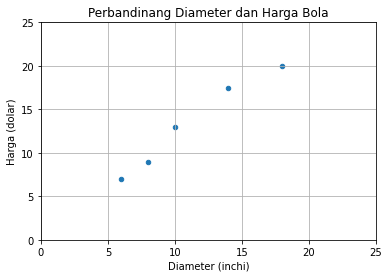

In [5]:
import matplotlib.pyplot as plt

bola_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandinang Diameter dan Harga Bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('Harga (dolar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

**Model Simple Linier Regression**

1. Penyesuaian Dataset  

In [6]:
import numpy as np

x = np.array(bola_df['diameter']) 
y = np.array(bola_df['harga']) 

print(f'x :{x}')
print(f'y :{y}')

x :[ 6  8 10 14 18]
y :[ 7.   9.  13.  17.5 20. ]


In [7]:
x = x.reshape(-1,1) 
x.shape

(5, 1)

In [8]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

**Training Simple Linier Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualisasi Simple Linear Regression Model**

In [10]:
x_vls = np.array([0,25]).reshape(-1,1)
y_vls = model.predict(x_vls)

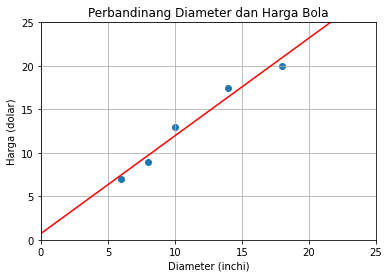

In [11]:
plt.scatter(x, y)
plt.plot(x_vls, y_vls, '-r')

plt.title('Perbandinang Diameter dan Harga Bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('Harga (dolar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [12]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 0.7241379310344875
slope: [1.12284483]


**mencari Nilai Slope**

In [14]:
print(f'x:\n{x}\n')
print(f'x flatten : {x.flatten()}\n')
print(f'y ; {y}')

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten : [ 6  8 10 14 18]

y ; [ 7.   9.  13.  17.5 20. ]


**Variance**

In [15]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


**Covariance**

In [16]:
np.cov(x.flatten(), y)

array([[23.2 , 26.05],
       [26.05, 30.2 ]])

In [17]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance : {covariance_xy}')

covariance : 26.049999999999997


**Nilai Slope**

In [18]:
slope = covariance_xy / variance_x
print(f'slope : {slope}')

slope : 1.1228448275862069


In [19]:
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept : {intercept}')

intercept : 0.724137931034484


**prediksi harga bola berdasarkan ukuran diameter**

In [20]:
diameter_bola = np.array([7, 13, 15]).reshape(-1,1)
diameter_bola

array([[ 7],
       [13],
       [15]])

In [21]:
prediksi_harga = model.predict(diameter_bola)
prediksi_harga

array([ 8.58405172, 15.32112069, 17.56681034])

In [22]:
for dmtr, hrg in zip(diameter_bola, prediksi_harga):
  print(f'Diameter : {dmtr} Prediksi Harga : {hrg}')


Diameter : [7] Prediksi Harga : 8.584051724137934
Diameter : [13] Prediksi Harga : 15.321120689655174
Diameter : [15] Prediksi Harga : 17.566810344827587


**Evaluasi simple Linear Regression Model Training & Testing Dataset**

In [30]:
x_train = np.array([6,8,10,14,18]).reshape(-1,1) 
y_train = np.array([7,9,13,17.5,20])

x_test = np.array([8,9,11,16,12]).reshape(-1,1) 
y_test = np.array([11,8.5,15,18,11])


**Training Simple Linear Regression Model**

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared**

In [32]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test) 

r_squared = r2_score(y_test, y_pred)
print(f'R-squared : {r_squared}')

R-squared : 0.6213315163349296
